<a href="https://colab.research.google.com/github/tinhngovnptho/CP/blob/main/AI/Code/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np


url = "https://raw.githubusercontent.com/tinhngovnptho/CP/refs/heads/main/AI/Data_AI_Train/"


df = pd.read_csv(url + "baitap.csv")

df

,x,y
0,0,4
1,1,0
2,1,0
3,2,-2
4,3,-3
5,4,-6
6,4,-7
7,5,-10
8,6,-13
9,6,-11


In [63]:
!pip install wandb

In [22]:
!pip uninstall wandb -y
!pip install wandb --upgrade


Found existing installation: wandb 0.19.7
Uninstalling wandb-0.19.7:
  Successfully uninstalled wandb-0.19.7
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 44.2 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
import wandb
from wandb.integration.keras import WandbCallback
from tensorflow.keras.callbacks import Callback

class Mycallback(Callback):
  def on_epoch_end(self, epoch, logs=None):
    if (epoch % 10 == 0):
      print(f"Epoch {epoch}, loss: {logs['loss']}")

wandb.login()

wandb.init( project="ex_keras", config={
  "learning_rate": 0.01,
  "epochs": 100,
  "batch_size": 8
})

config = wandb.config

train_x = df['x'].to_numpy()
train_y = df['y'].to_numpy()

train_x.reshape(-1, 1)
train_y.reshape(-1, 1)

model = tf.keras.Sequential([
  Dense(1, input_shape=(1,)),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss = 'mean_squared_error')

model.summary()

his = model.fit(
    train_x,
    train_y,
    epochs= 100,
    batch_size= 8,
    verbose = 0,
    validation_split= 0.2,
    callbacks=[WandbCallback()],
)

In [60]:
hist = pd.DataFrame(his.history)
hist['epoch'] = his.epoch
hist.tail()

,loss,val_loss,epoch
95,0.364200,0.958500,95
96,0.489898,1.181218,96
97,0.519862,0.374123,97
98,0.392836,0.595290,98
99,0.533444,0.340999,99


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


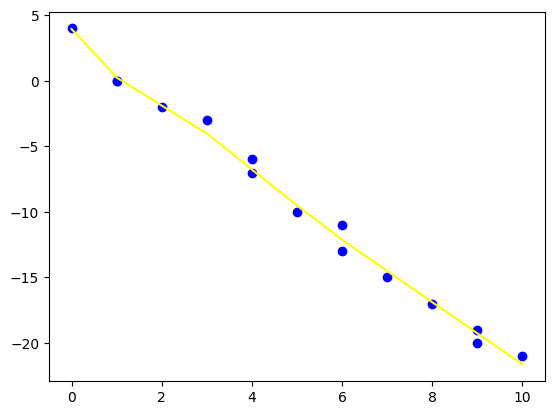

In [61]:
import matplotlib.pyplot as plt
y_pred = model.predict(train_x)

plt.scatter(train_x, train_y, color="blue")
plt.plot(train_x, y_pred, color="yellow")
plt.show()